In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
import numpy as np
import matplotlib as mpl
import re

In [4]:
traditional_ml_str = ""
with open('/content/traditional_ml_output.v1.txt', 'r') as file:
    traditional_ml_str = file.readlines()

In [ ]:
type(traditional_ml_str)

In [17]:
# ACCURACY
traditional_ml_str_list_acc = traditional_ml_str[1].split(': ')[1].replace('[','').replace(']','').replace(' ','').split(',')
# LOSS
traditional_ml_str_list_loss = traditional_ml_str[0].split(': ')[1].replace('[','').replace(']','').replace(' ','').split(',')

In [18]:
traditional_ml_float_list_acc = [float(x) for x in traditional_ml_str_list_acc]
traditional_ml_float_list_loss = [float(x) for x in traditional_ml_str_list_loss]

In [21]:
fl_ml_str = ""
with open('/content/fl_ml_output.v1.txt', 'r') as file:
    fl_ml_str = file.readlines()

In [ ]:
fl_ml_str

# YOU HAVE TO COPY THE FIRST 15 VALUES OF MODEL INITIAL BY HAND (MODEL INITIAL IS SET TO 15 EPOCHS) 


In [45]:
fl_ml_float_list_acc = [0.6677, 0.7748, 0.8038, 0.8229, 0.8362, 0.8530, 0.8652, 0.8737, 0.8817, 0.8879, 0.8937, 0.8971, 0.8996, 0.9013, 0.9036]

for value in fl_ml_str[1].split('[')[1].replace(']', '').replace(' ', '').replace('}','').replace('\n','').split('),('):
    percentage_only_str = value.split(',')[1].replace(')','')
    fl_ml_float_list_acc.append(float(percentage_only_str))

In [46]:
fl_ml_float_list_loss = [1.2678, 0.8240, 0.7150, 0.6326, 0.5629, 0.5105, 0.4723, 0.4448, 0.4241, 0.4085, 0.3954, 0.3838, 0.3741, 0.3662, 0.3581]

for value in fl_ml_str[0].split('[')[1].replace(']', '').replace(' ', '').replace('}','').replace('\n','').split('),('):
    percentage_only_str = value.split(',')[1].replace(')','')
    fl_ml_float_list_loss.append(float(percentage_only_str))

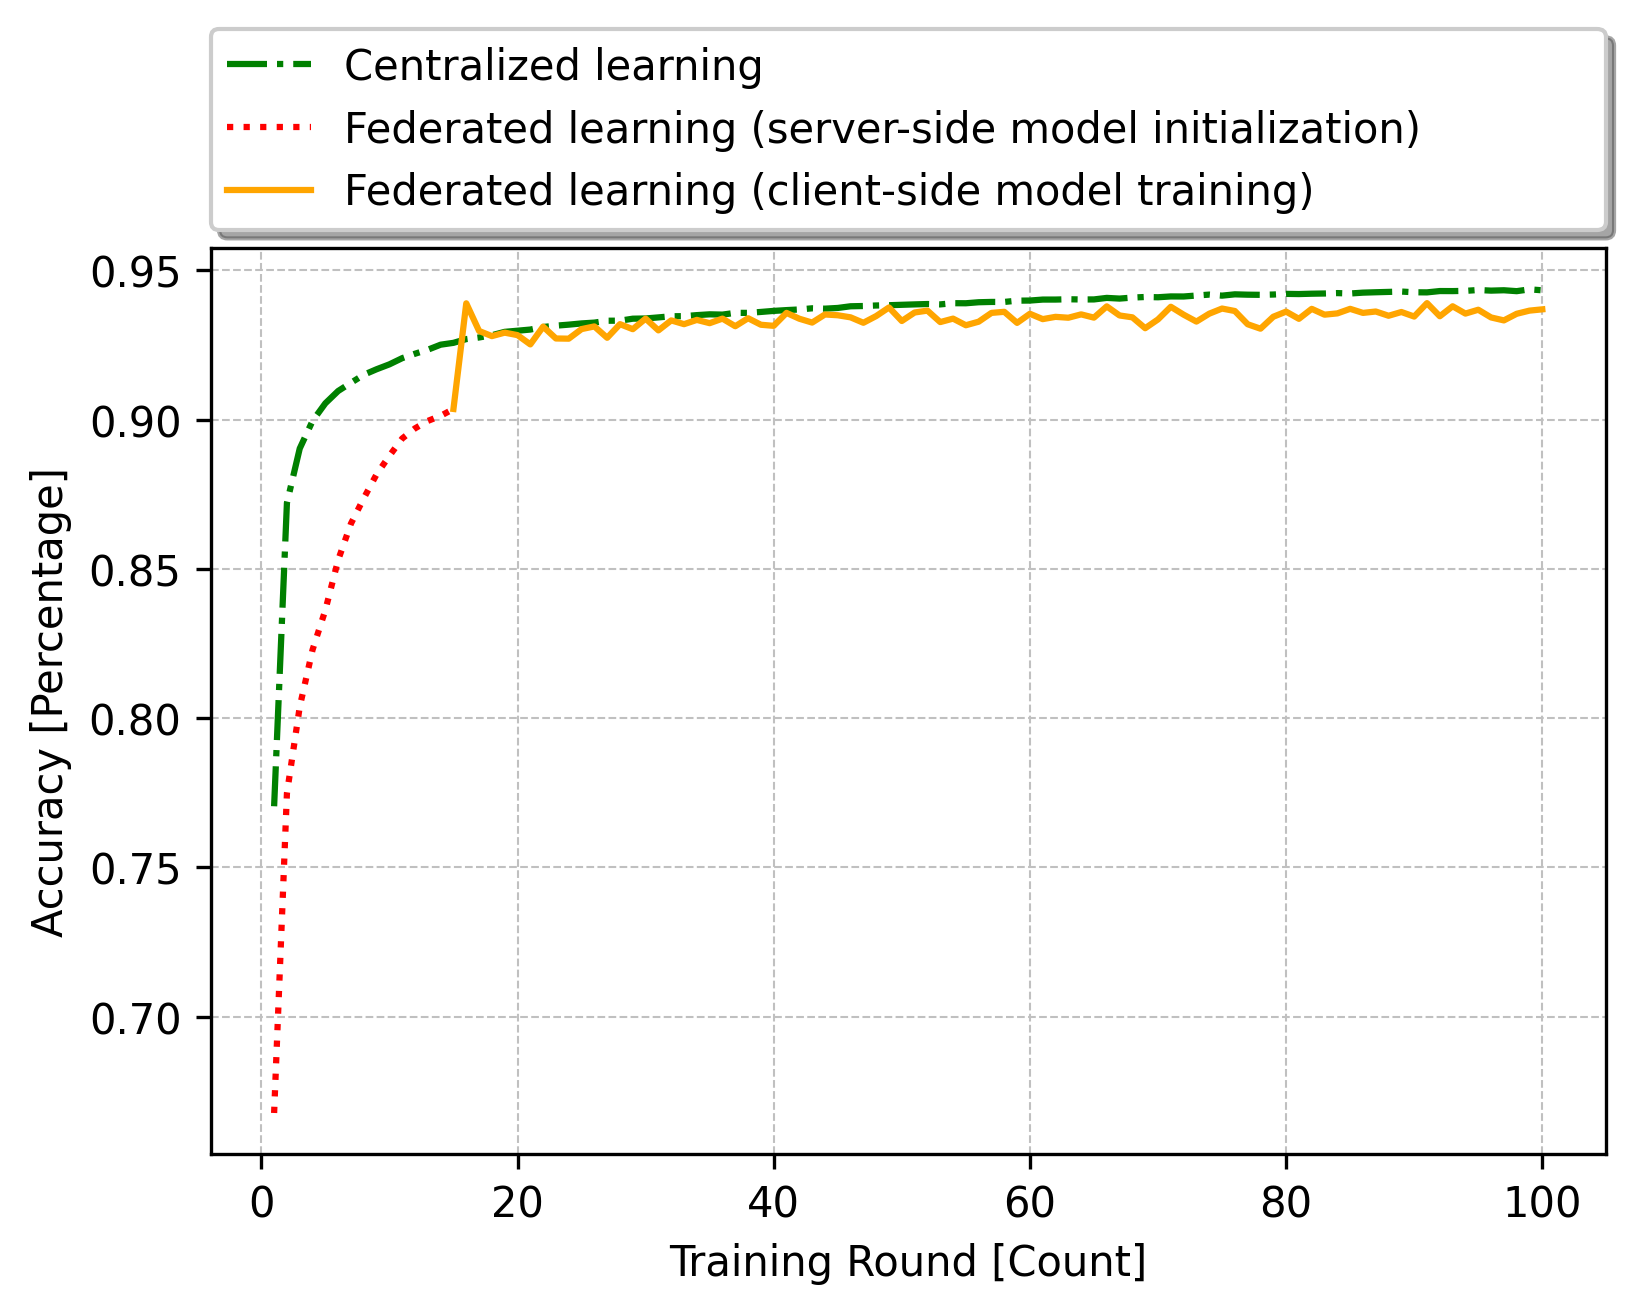

In [91]:
# ACC centralized vs regular

fig, ax = plt.subplots(dpi=300)
mpl.style.use('seaborn-pastel')
plt.grid(which='both', color='silver', linestyle='--', linewidth=0.5)

p1, = ax.plot(range(1,101,1), traditional_ml_float_list_acc, label='Centralized learning', linestyle='-.', color='green')
p2, = ax.plot(range(1, 16, 1), fl_ml_float_list_acc[:15], label='Federated learning (server-side model initialization)', linestyle=':', color='red')
p3, = ax.plot(range(15, 101, 1), fl_ml_float_list_acc[14:100], label='Federated learning (client-side model training)', color='orange')

ax.legend(handles=[p1, p2, p3], shadow=True, bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand",
               borderaxespad=0, ncol=1, fancybox=True)

ax.set_xlabel('Training Round [Count]')
ax.set_ylabel('Accuracy [Percentage]')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])

plt.show()

fig.savefig('fl-ml-acc.png', bbox_inches = 'tight')

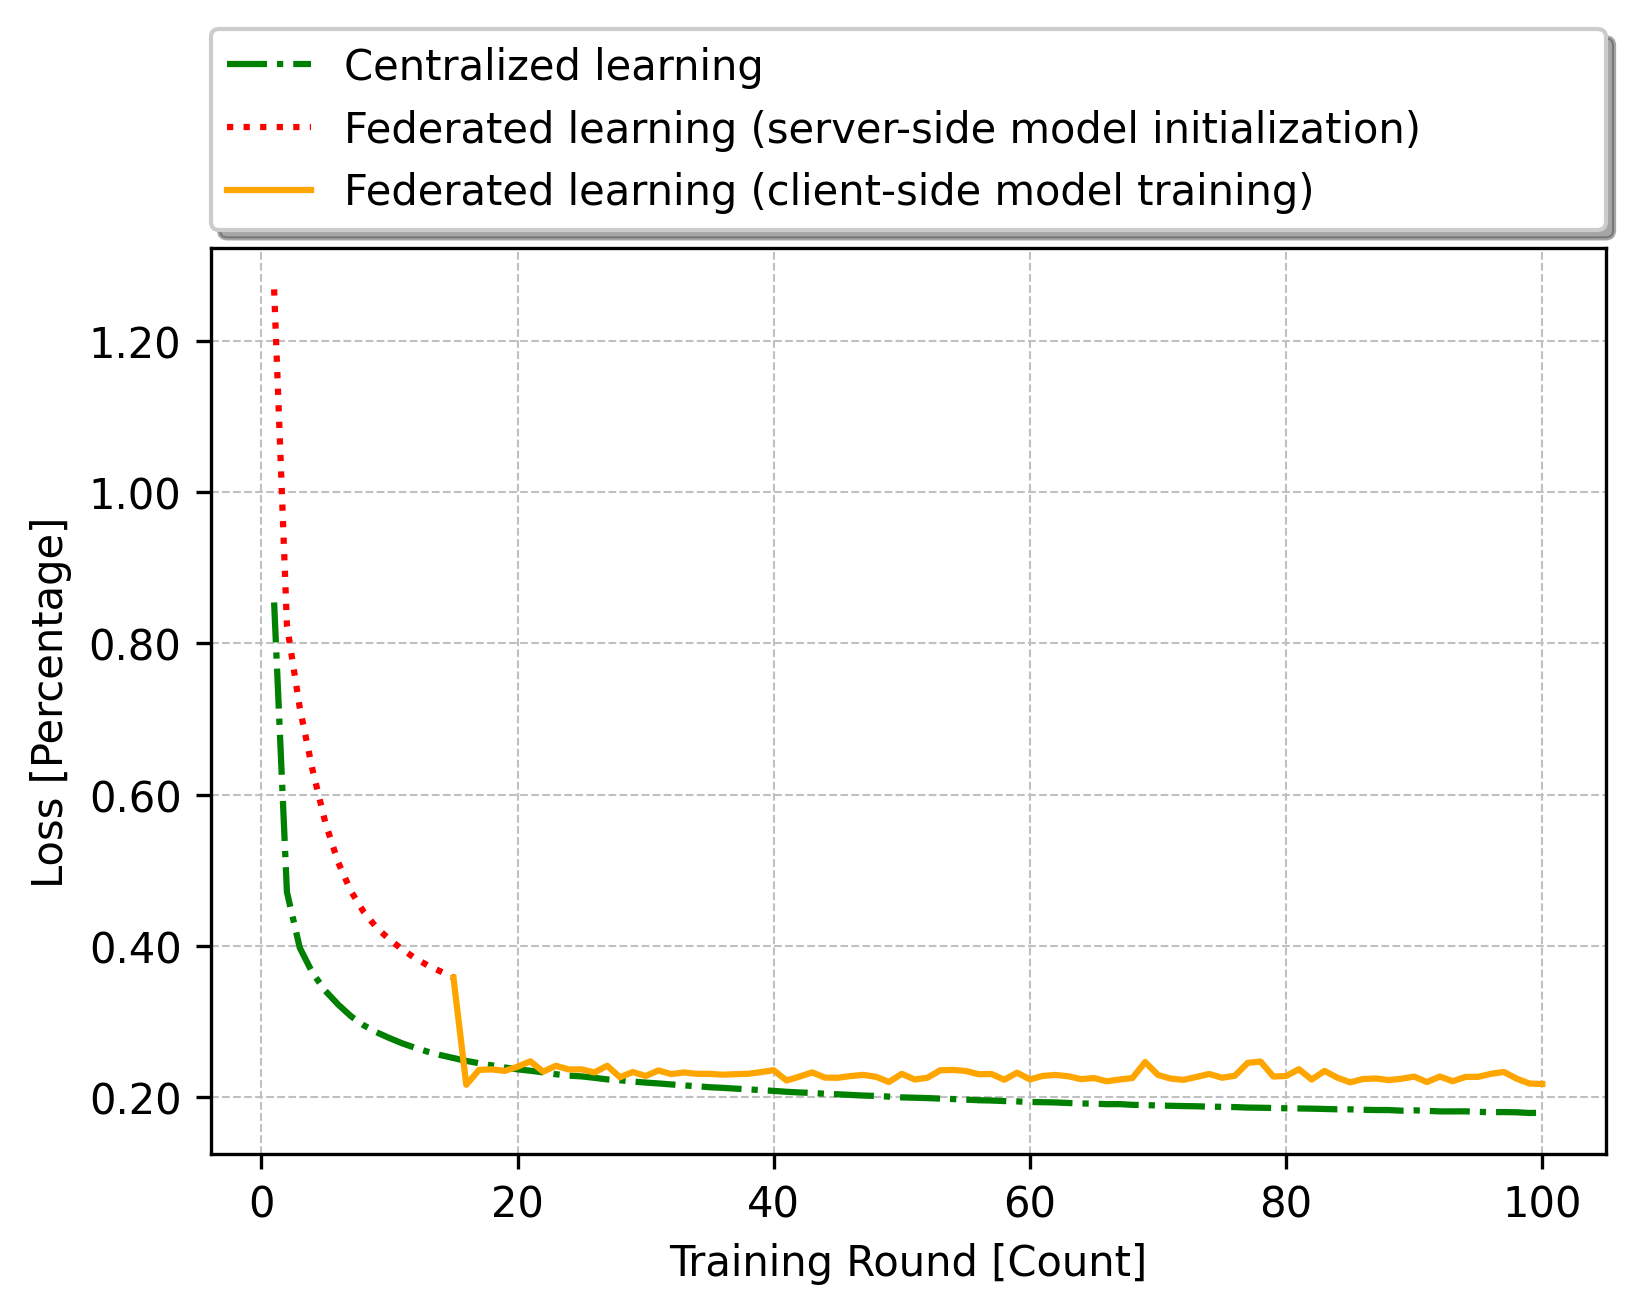

In [92]:
# LOSS centralized vs regular

fig, ax = plt.subplots(dpi=300)
mpl.style.use('seaborn-pastel')
plt.grid(which='both', color='silver', linestyle='--', linewidth=0.5)

p1, = ax.plot(range(1,101,1), traditional_ml_float_list_loss, label='Centralized learning', linestyle='-.', color='green')
p2, = ax.plot(range(1, 16, 1), fl_ml_float_list_loss[:15], label='Federated learning (server-side model initialization)', linestyle=':', color='red')
p3, = ax.plot(range(15, 101,1), fl_ml_float_list_loss[14:100], label='Federated learning (client-side model training)', color='orange')

ax.legend(handles=[p1, p2, p3], shadow=True, bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand",
               borderaxespad=0, ncol=1, fancybox=True)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in current_values])

ax.set_xlabel('Training Round [Count]')
ax.set_ylabel('Loss [Percentage]')
plt.show()

fig.savefig('fl-ml-loss.png', bbox_inches = 'tight')